<h1><font color=blue>Compte rendu TP3:Linear Regression</font></h1>

<h1><font color=red>Réalisé par :   Khalifa Selma </font></h1>
<h2><font color=black >3DNI_G2 </font></h2>
<h2><font color=green>Année universitaire : 2020/2021</font><h2>  

<h2><font color=maroon >Objectif :</font></h2>

Ce Tp permet de montrer les concepts de base de l’analyse de données : la régression linéaire.

<h2><font color=maroon >Travail demandé :</font></h2>

Une régression a pour objectif d’expliquer une variable Y par une autre variable X.<br>
Dans notre cas on s’intéresse à la régression linéaire qui modélise la relation entre X et Y par une équation linéaire.<br>
on parle de régression linéaire simple car il y a une seule variable explicative. Ainsi on parlera de régression linéaire multiple lorsqu’on aura au moins deux variables explicatives.

<h2> Example 1 </h2>

Determining the linear relationship between two variables (Gravity constant of the earth).
Let’s think back to physics class in school. There, we learned that the gravitation of the
earth accelerates the speed of every falling object by a constant g of about g =9:801m/s2
near the equator. This means that a falling object freely increases its velocity by 9.801 m/s2
per second it falls.
School was a long time ago for most of us; however, and so now, we check this basic
constant again, with the help of regression analysis. According to physics, there is a linear
relationship, h =gxS, where h is the height from which an object is falling, and S is the
squared time in seconds that the object needs to reach the ground.
In this example, there is only a single input variable, and so these kinds of models are
called univariate or simple; but regression models can also be used to estimate more
complex linear variable connections. In these cases, the models are called multiple linear
regression models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Tout d’abord, il faudra lire et charger les données contenues dans le fichier CSV. Python propose via sa librairie Pandas des classes et fonctions pour lire divers formats de fichiers dont le CSV.<br>
La fonction read_csv(), renvoie un DataFrame.

In [2]:
# Data loading
df = pd.read_csv('grav.csv')
df.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


Selection de la première colonne et  seconde colonne de dataset<br>
La fonction len() permet d’obtenir la taille d’un tableau
La fonction iloc permet de récupérer une donnée par sa position

In [3]:
# Selection of the first column of our dataset (height)
X = df.iloc[0:len(df),0]
# Selection of second columns of our dataset (seconds squared)
Y = df.iloc[0:len(df),1] 

Matplotlib est la librairie python permettant de faire des graphes de plusieurs types :<br>
-Histogrammes<br>
-Nuages de Points,<br>
-Dessiner des courbes de fonctions<br>
Le code Python permettant d’effectuer ce nuage de points est le suivant :<br>
On utilise un graphe de type nuage de points (Scatter plot) pour visualiser les données.

  

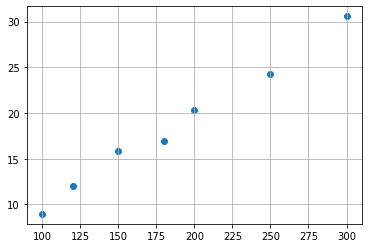

In [4]:
axes = plt.axes()
# Draw a grid
axes.grid()  
# X and Y are the variables that we extracted in the previous part
plt.scatter(X,Y) 
plt.show()

linregress() renvoie plusieurs variables de retour. On s'interessera particulierement au slope et intercept.<br>
Après que la fonction linregress() on renvoye les paramètres de  modèle : slope et intercept, on pourra effectuer des prédictions.<br>
ce qui donne une ligne droite.

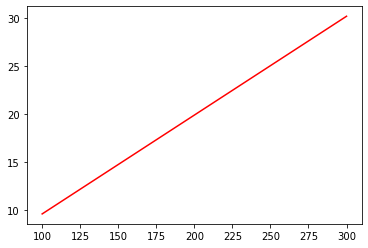

In [5]:
from scipy import stats

# Linregress () returns multiple return variables - We are particularly interested in slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
# The fitLine variable will be an array of predicted values from the X array
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

In [6]:
# Print the value of 'slope'
print (slope)

0.10280912511759172


In [7]:
# Print the value of 'intercept'
print (intercept)

-0.6801232361241745


<h2> Example 2 </h2>

Determination of variable relations and prediction of variables (Analysis of pretest and final
exam results).
Students often prepare for exams by taking tests in advance. This gives students the opportunity to become familiar with the type and complexity of questions asked, as well as a
chance to check their degree of readiness for the final exam.
To find out if pretesting is helpful, we can inspect the relationship between the performances in both exams. As well as measuring with an appropriate correlation coefficient, we
can model the exact relationship using linear regression.
In addition, we are interested in a prediction of the final exam scores from future students,
based on their pretest scores. This can be done by applying the build regression model on
this new dataset of pretest results. We provides a dataset called “test_scores.sav” , which
comprises data for the kind of analysis described here.

pyreadstat:Un package python pour lire et écrire des fichiers de données sas (sas7bdat, sas7bcat, xport), spps (sav, zsav, por) et stata (dta) dans / à partir des dataframes pandas.

In [8]:
!pip install pyreadstat

In [9]:
# Data loading
import pyreadstat

df, metadata = pyreadstat.read_sav("test_scores.sav")
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
5,ANKYI,1.0,2.0,6OL,0.0,20.0,7YZO8,1.0,2.0,66.0,74.0
6,ANKYI,1.0,2.0,6OL,0.0,20.0,9KMZD,0.0,2.0,63.0,75.0
7,ANKYI,1.0,2.0,6OL,0.0,20.0,9USQK,1.0,2.0,63.0,72.0
8,ANKYI,1.0,2.0,6OL,0.0,20.0,CS5QP,0.0,2.0,64.0,77.0
9,ANKYI,1.0,2.0,6OL,0.0,20.0,D6HT8,1.0,2.0,61.0,72.0


In [10]:
# Shape of our dataset
df.shape
# Info our dataset
df.info()
# Describe our dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


En utilisant pairplot, nous visualiserons les données pour la corrélation.<br>



C:\Users\Client\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


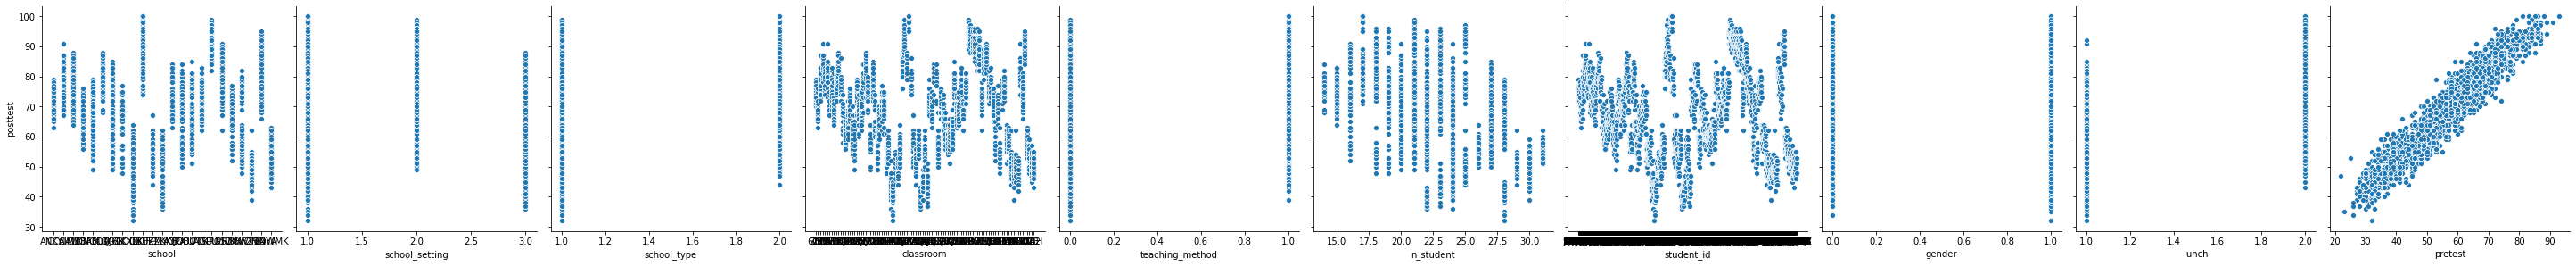

In [11]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['school','school_setting','school_type','classroom','teaching_method','n_student','student_id','gender', 'lunch','pretest'], 
             y_vars='posttest', size=4, aspect=1, kind='scatter')
plt.show()

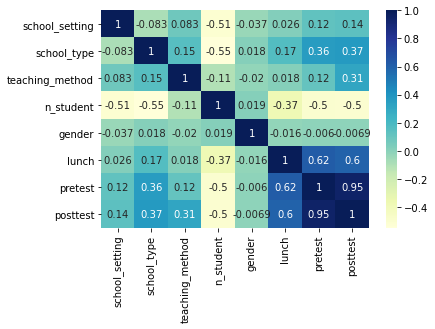

In [12]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0, 0.5, 'posttest')

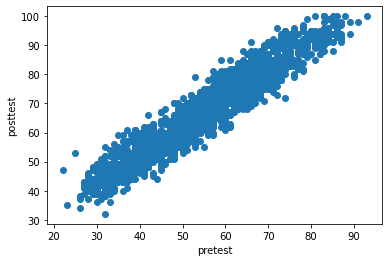

In [13]:
# Creer X et y
X = df['pretest']
y = df['posttest']
plt.scatter(X,y)
plt.xlabel("pretest")
plt.ylabel("posttest")

Splitting the varaibles as training and testing

In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [15]:
X_train
y_train

1455    81.0
299     67.0
1912    49.0
863     92.0
298     64.0
        ... 
350     57.0
1930    53.0
79      79.0
1859    47.0
1544    89.0
Name: posttest, Length: 1493, dtype: float64

<h3>Regression en utilisant statsmodels</h3>

In [16]:
# Importing Statsmodels.api library from Stamodel package
#Statsmodels s'appuie sur pandas pour le stockage des données
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [17]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Printing the parameters
lr.params

const      13.374988
pretest     0.978308
dtype: float64

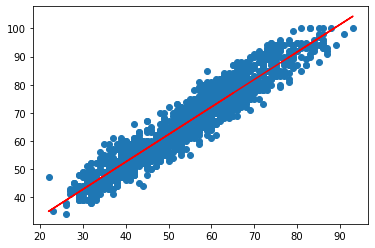

In [18]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 13.3750 + 0.9783*X_train, 'r')
plt.show()

In [19]:
# Predicting y_value using train data of X
y_train_pred = lr.predict(X_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

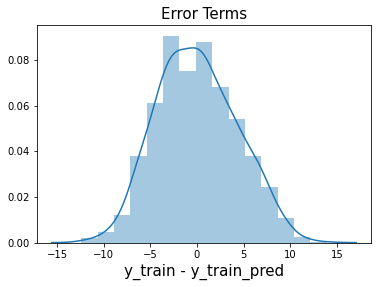

In [20]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

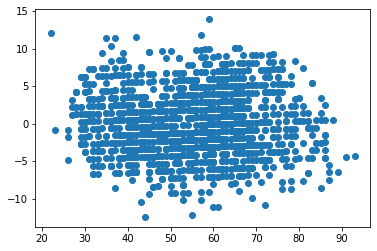

In [21]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [22]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)
# Printing the first 15 predicted values
y_test_pred

686     58.377169
1836    58.377169
1587    88.704726
63      78.921643
1348    71.095177
          ...    
146     76.965027
374     51.529011
1989    75.986718
581     53.485628
272     64.247019
Length: 640, dtype: float64

In [23]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9009451419275621

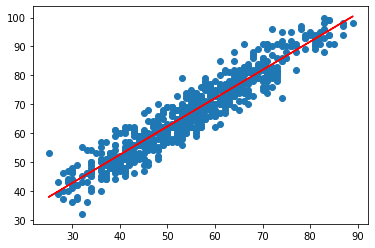

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [25]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [26]:
# Shape of the train set without adding column
X_train_lm.shape
# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(X_test_lm.shape)

(1493, 1)
(640, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# Create an object of Linear Regression
lm = LinearRegression()
# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [28]:
# Intercept value
print("Intercept :",lm.intercept_)
# Slope value
print('Slope :',lm.coef_)

Intercept : 13.374988195767308
Slope : [0.97830828]


In [29]:
# Predictions 
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9054961340673476
0.900945141927562


<h2> Example 3 </h2>

Linear Regression with the Regression Node In this exercise, we build a regression model for the
Boston housing data, housing.data.txt , with the Regression node.
1. Import the data and specify the variable types with the Type node.
2. Add a Regression node to the stream and select MEDV as the target variable and all other variables as the
input.
3. Choose the Backwards method to find the significant input variables and then run the stream.
4. Inspect the model nugget and identify the estimated coefficients and the regression equation. Which variables are included in the final model, and which variable has a coefficient of 3.832?
5. What is the value of R2 and the adjusted R2 ?
The following exercise is optional and includes adding a cross-validation to the
stream.
6. Include a Partition node in the stream and divide the dataset into 70 % training data and 30 % test data.
7. Select the partition field in the Fields tab of the Regression node, setting it to use only the training data in
the model building procedure.
8. Add an Analysis node to the model nugget and run the stream again. Is the model suitable for processing
unknown data?

<h3>1. Import the data and specify the variable types with the Type node.</h3>

In [30]:
boston = pd.read_csv('housing.data.txt' , sep=",")
# Affichage de la taille du dataset 
print(boston.shape)
boston.head()


(506, 14)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


 Prétraitement des données 

Après avoir chargé les données, on vérifie s'il y a des valeurs manquantes dans les données.on compte le nombre de valeurs manquantes pour chaque fonctionnalité en utilisant isnull ().

In [32]:
boston.isnull().sum()

CIRM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

 L'analyse des données

L'analyse exploratoire des données est une étape très importante avant la formation du modèle. donc on utilise quelques visualisations pour comprendre la relation de la variable cible avec d'autres fonctionnalités.

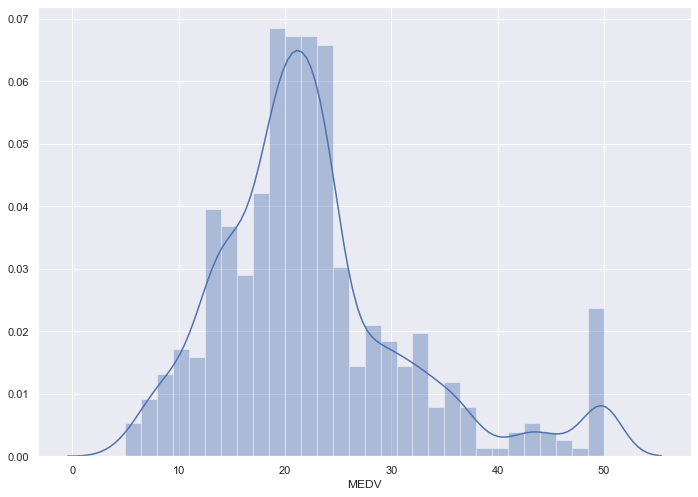

In [33]:
# Plot the distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

On remarque que les valeurs de MEDV sont distribuées normalement avec peu de outliers.<br>
Ensuite, nous créons une matrice de corrélation qui mesure les relations linéaires entre les variables. La matrice de corrélation peut être formée en utilisant la fonction corr de la bibliothèque pandas dataframe. Nous utiliserons la fonction heatmap de la bibliothèque seaborn pour tracer la matrice de corrélation.

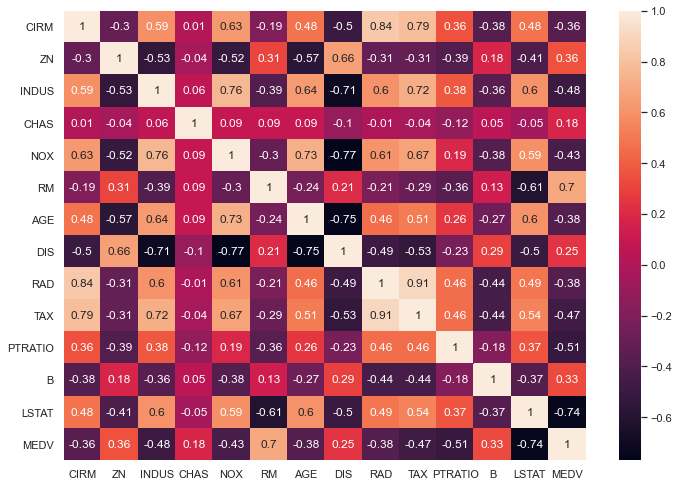

In [34]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Le coefficient de corrélation entre -1 à 1. Si la valeur est proche de 1, alors signifie qu'il existe une forte corrélation positive entre les deux variables. Lorsqu'il est proche de -1, les variables ont une forte corrélation négative.<br>
=>on remarque qu'il ya forte correlation 

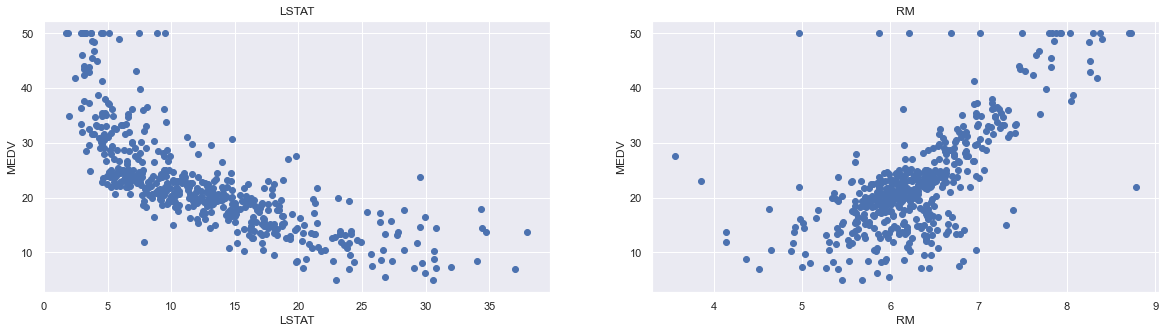

In [35]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

 la valeur de RM augmente linéairement. Il y a peu de valeurs aberrantes et les données semblent plafonnées à 50.
 une augmentation de LSTAT. Bien qu'il ne semble pas suivre exactement une ligne linéaire.



<h3>2. Add a Regression node to the stream and select MEDV as the target variable and all other variables as the
input.</h3>

In [36]:
import numpy as np
X = boston.drop("MEDV", axis=1)
Y = boston["MEDV"].to_numpy() #y est un vecteur
print('X:', np.shape(X), 'y:', np.shape(Y))

X: (506, 13) y: (506,)


<h3>3.Diviser les données en training sets et testing sets </h3>

on divise  les données de training  et de test. on forme un  modèle avec 70% des échantillons et testons avec les 30% restants. Nous faisons cela pour évaluer les performances du modèle sur des données invisibles. on  utilise aussi la fonction train_test_split fournie par la bibliothèque scikit-learn.ensuite  on a les tailles de notre ensemble d'entraînement et de test pour vérifier si le fractionnement s'est produit correctement.

In [37]:
from sklearn.model_selection import train_test_split


# `stratify`  permet de s'assurer que les variables y sont équitablement réparties entre les deux ensembles train et test.
bins = np.linspace(Y.min(), Y.max(), 100)
y_binned = np.digitize(Y, bins)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


Training et test le modele

on utilise la régression linéaire pour entraîner le modèle sur les ensembles de train et de test.

In [38]:
# Fitting the training data to the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

regressor.score(X_test, Y_test)


0.6872122809626446

<h3>5. What is the value of R2 and the adjusted R2 ?</h3>

on va evaluer avec RMSE et R2-score.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score 

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
Y_pred = regressor.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
r2 = r2_score(Y_train, Y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
Y_pred = regressor.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.7506477558555941  et RMSE= 4.461793457161063
Testing: R2= 0.6872122809626446  et RMSE= 5.453633333553372


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []


pipelines.append(Pipeline([('clf', LinearRegression())]))
params.append({'clf__normalize':[True]})
names.append('LinearRegression')#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, Y):    
    cv = KFold(n_splits=2, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,Y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,Y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, Y_train))

LinearRegression R2: 0.6870622843636652


on obtenir le score de R2  egale  0.6870622843636652

<h2><font color=maroon>Conclusion :</font></h2>

algorithme de régression linéaire est sa simplicité d’interprétation et sa facilité de calcul. 

Le modèle présente quelques inconvénients comme le fait que l’algorithme est très sensible aux valeurs aberrantes (outliers) des données d’apprentissage d’où la nécessité de bien préparer ses données dès le départ. Il existe des méthodes dites de régularisation pour pallier à ce problème. Les méthodes de régularisation permettent de pénaliser les valeurs trop grandes des coefficients.